## Data inspection of the real propecty sales file

File name: Real Property Sales <br> 
Location: Documents/Data Science/Fatiron School/week3/

## Step 1: Unziping the file

In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

## Step 2: Inspecting the files content

In [3]:
## Import pandas and inspect the content of the data using a DataFrame

import pandas as pd

sales_df = pd.read_csv('raw_data/Real Property Sales.zip')
sales_df.head()


/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [4]:
bldg_df = pd.read_csv('raw_data/Residential Building.zip')
bldg_df.head()

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,520,67,1,1,6781 MARS AVE S 98108,6781,,,MARS,AVE,...,1,0,1,1940,2014,0,0,0,3,0
1,640,7,1,1,45216 196TH AVE SE 98022,45216,,,196TH,AVE,...,1,0,0,1961,0,0,0,0,4,0
2,640,16,1,1,20410 SE 456TH WAY 98022,20410,,SE,456TH,WAY,...,0,0,0,2004,0,0,0,0,3,0
3,660,96,1,1,8501 S 259TH ST 98030,8501,,S,259TH,ST,...,0,0,0,1933,0,0,0,0,4,0
4,720,13,1,1,84 LOGAN AVE S 98055,84,,,LOGAN,AVE,...,0,0,0,1924,0,0,0,0,3,0


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 372.3+ MB


In [6]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512548 entries, 0 to 512547
Data columns (total 50 columns):
Major                 512548 non-null int64
Minor                 512548 non-null int64
BldgNbr               512548 non-null int64
NbrLivingUnits        512548 non-null int64
Address               512548 non-null object
BuildingNumber        512548 non-null object
Fraction              512548 non-null object
DirectionPrefix       511984 non-null object
StreetName            512548 non-null object
StreetType            512548 non-null object
DirectionSuffix       511984 non-null object
ZipCode               468452 non-null object
Stories               512548 non-null float64
BldgGrade             512548 non-null int64
BldgGradeVar          512548 non-null int64
SqFt1stFloor          512548 non-null int64
SqFtHalfFloor         512548 non-null int64
SqFt2ndFloor          512548 non-null int64
SqFtUpperFloor        512548 non-null int64
SqFtUnfinFull         512548 non-null int64

## step 3: Reducing the dataframe to include the relevant factors 

In [7]:
sales_df = sales_df[['Major', 'Minor', 'SalePrice', 'DocumentDate', 'PrincipalUse','ExciseTaxNbr']]
sales_df.head()

,Major,Minor,SalePrice,DocumentDate,PrincipalUse,ExciseTaxNbr
0,138860,110,245000,08/21/2014,6,2687551
1,664885,40,0,07/09/1991,0,1235111
2,423943,50,0,10/11/2014,6,2704079
3,403700,715,0,01/04/2013,6,2584094
4,951120,900,85000,04/20/1989,0,1056831


In [8]:
bldg_df = bldg_df[['Major', 'Minor', 'ZipCode', 'BldgGrade', 'SqFtTotLiving', 'Bedrooms', 'BathHalfCount', 
                   'Bath3qtrCount', 'BathFullCount', 'YrBuilt', 'YrRenovated']]
bldg_df.head()

,Major,Minor,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,520,67,98108,7,2360,3,0,1,2,1940,2014
1,640,7,98022,6,1770,3,1,0,1,1961,0
2,640,16,98022,9,2720,3,1,0,3,2004,0
3,660,96,98030,7,1360,4,0,0,1,1933,0
4,720,13,98055,6,1270,3,0,0,1,1924,0


## step 4: merge two files 

In [9]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

In [10]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [11]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [40]:
sales_data.head().T

,0,1,2,3,4
Major,138860,138860,138860,138860,423943
Minor,110,110,110,110,50
SalePrice,245000,109300,14684,0,0
DocumentDate,08/21/2014,06/12/1989,01/16/2005,06/08/2005,10/11/2014
PrincipalUse,6,0,6,0,6
ExciseTaxNbr,2687551,1066933,2102034,2131568,2704079
ZipCode,98002,98002,98002,98002,98092
BldgGrade,7,7,7,7,6
SqFtTotLiving,1490,1490,1490,1490,960
Bedrooms,3,3,3,3,3


## step 5: data cleaning 

In [41]:
sales_data.isna().any()

Major            False
Minor            False
SalePrice        False
DocumentDate     False
PrincipalUse     False
ExciseTaxNbr     False
ZipCode           True
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathHalfCount    False
Bath3qtrCount    False
BathFullCount    False
YrBuilt          False
YrRenovated      False
dtype: bool

In [42]:
sales_data.isna().sum()

Major                 0
Minor                 0
SalePrice             0
DocumentDate          0
PrincipalUse          0
ExciseTaxNbr          0
ZipCode          118382
BldgGrade             0
SqFtTotLiving         0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
YrRenovated           0
dtype: int64

In [12]:
def clean_zips(x):
    x = str(x)
    if len(x) >= 5 and x[:2] == '98':
        x = x[:5]
        return int(x)
    else:
        return np.nan

sales_data['ZipCode'] = sales_data['ZipCode'].apply(clean_zips)

sales_data.head()

,Major,Minor,SalePrice,DocumentDate,PrincipalUse,ExciseTaxNbr,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,245000,08/21/2014,6,2687551,98002.0,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,109300,06/12/1989,0,1066933,98002.0,7,1490,3,0,0,2,1989,0
2,138860.0,110.0,14684,01/16/2005,6,2102034,98002.0,7,1490,3,0,0,2,1989,0
3,138860.0,110.0,0,06/08/2005,0,2131568,98002.0,7,1490,3,0,0,2,1989,0
4,423943.0,50.0,0,10/11/2014,6,2704079,98092.0,6,960,3,0,0,1,1969,0


In [114]:
print(len(sales_data[sales_data['ZipCode'] == 'A']))
print(len(sales_data[sales_data['ZipCode'] == 'B']))
print(len(sales_data[sales_data['ZipCode'] == 'WA']))
print(len(sales_data[sales_data['ZipCode'] == '0']))

3
1
3
1


Given the fact there are categorical data, we are replacing the values to null 

In [115]:
#sales_data.loc[(sales_data.ZipCode == 'A')
#               |(sales_data.ZipCode == '0')
#               |(sales_data.ZipCode == 'B')
#               |(sales_data.ZipCode == 'WA'),
#               'ZipCode'] = np.nan 

#delete
#sales_data.drop(sales_data[sales_data['ZipCode'] == 'A'].index, axis =0, inplace=True)
#sales_data.drop(sales_data[sales_data['ZipCode'] == 'B'].index, axis =0, inplace=True)
#sales_data.drop(sales_data[sales_data['ZipCode'] == 'WA'].index, axis =0, inplace=True)
#sales_data.drop(sales_data[sales_data['ZipCode'] == '0'].index, axis =0, inplace=True)


In [12]:
print(len(sales_data[sales_data['SalePrice'] == 0]))

492733


In [44]:
sales_data['ZipCode'].isna().sum()

118440

Given that 8.15% of the dataset contains missing values, we're keeping the null values in the dataset 

In [45]:
sales_data['ZipCode'].value_counts().head()

98042.0    40315
98115.0    37193
98023.0    36777
98038.0    33043
98034.0    32376
Name: ZipCode, dtype: int64

dropping all the rows that sale price = 0

In [13]:
sales_data = sales_data.loc[~(sales_data['SalePrice'] <=0), :]

In [14]:
sales_data = sales_data.loc[~(sales_data['SqFtTotLiving'] ==0), :]

subsetting the sale price to sale price between 10 - 90th range

In [16]:
lowest = np.percentile(sales_data['SalePrice'],10)
highest = np.percentile(sales_data['SalePrice'],90)

In [17]:
sales_data = sales_data[sales_data['SalePrice'] > lowest]

In [19]:
sales_data = sales_data[sales_data['SalePrice'] < highest]

In [20]:
len(sales_data)

767170

In [21]:
sales_data.head()

,Major,Minor,SalePrice,DocumentDate,PrincipalUse,ExciseTaxNbr,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,245000,08/21/2014,6,2687551,98002.0,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,109300,06/12/1989,0,1066933,98002.0,7,1490,3,0,0,2,1989,0
7,423943.0,50.0,127500,01/08/2001,6,1797156,98092.0,6,960,3,0,0,1,1969,0
11,403700.0,715.0,464500,07/03/2013,6,2617105,98008.0,7,1780,4,0,1,1,1957,0
12,403700.0,715.0,357000,02/21/2013,6,2590820,98008.0,7,1780,4,0,1,1,1957,0


we're only including the rows that have the principle use as 0,2,4,6,8

In [22]:
a = [0,2,4,6,8]
sales_data = sales_data[sales_data['PrincipalUse'].isin(a)]

dropping three columns that we beleive are not relevant

In [23]:
sales_data.drop(columns=['PrincipalUse'], axis=1, inplace=True)

In [24]:
sales_data.drop(columns=['BathHalfCount'], axis=1, inplace=True)

In [25]:
sales_data.drop(columns=['Bath3qtrCount'], axis=1, inplace=True)

create a new column for the year, where we take the year renovated(of the ones have the value) and year built as the value 

In [26]:
sales_data['DocumentDate'] = sales_data['DocumentDate'].apply(pd.Timestamp)

In [27]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765118 entries, 0 to 1451790
Data columns (total 12 columns):
Major            765118 non-null float64
Minor            765118 non-null float64
SalePrice        765118 non-null int64
DocumentDate     765118 non-null datetime64[ns]
ExciseTaxNbr     765118 non-null int64
ZipCode          708285 non-null float64
BldgGrade        765118 non-null int64
SqFtTotLiving    765118 non-null int64
Bedrooms         765118 non-null int64
BathFullCount    765118 non-null int64
YrBuilt          765118 non-null int64
YrRenovated      765118 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 75.9 MB


In [28]:
sales_data['Year'] = sales_data['DocumentDate'].apply(lambda ts:ts.year)

running saleprice vs all the predicters 

In [29]:
sales_data.corr()

,Major,Minor,SalePrice,ExciseTaxNbr,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Year
Major,1.000000,-0.296552,0.021844,0.009657,-0.004214,0.011430,-0.013734,0.001351,0.011583,0.014752,-0.019146,0.009139
Minor,-0.296552,1.000000,0.008156,0.005405,-0.000813,-0.009045,0.061431,-0.025531,0.001251,-0.023681,0.050665,0.005595
SalePrice,0.021844,0.008156,1.000000,0.550943,-0.000964,0.380422,0.342602,0.158857,0.216411,0.156966,0.023910,0.544866
ExciseTaxNbr,0.009657,0.005405,0.550943,1.000000,0.045476,-0.118473,-0.105962,-0.041390,-0.004699,0.092329,-0.016798,0.998280
ZipCode,-0.004214,-0.000813,-0.000964,0.045476,1.000000,-0.187443,-0.164150,-0.120917,-0.114102,-0.380666,0.072648,0.045149
BldgGrade,0.011430,-0.009045,0.380422,-0.118473,-0.187443,1.000000,0.725743,0.343612,0.444964,0.454620,-0.008379,-0.118382
SqFtTotLiving,-0.013734,0.061431,0.342602,-0.105962,-0.164150,0.725743,1.000000,0.591418,0.543717,0.330128,0.053711,-0.106260
Bedrooms,0.001351,-0.025531,0.158857,-0.041390,-0.120917,0.343612,0.591418,1.000000,0.416298,0.175050,0.014742,-0.041509
BathFullCount,0.011583,0.001251,0.216411,-0.004699,-0.114102,0.444964,0.543717,0.416298,1.000000,0.389686,0.041007,-0.005337
YrBuilt,0.014752,-0.023681,0.156966,0.092329,-0.380666,0.454620,0.330128,0.175050,0.389686,1.000000,-0.240025,0.091615


## OneHotEncoder

In [47]:
from sklearn.preprocessing import OneHotEncoder

Since OneHotEncoder doesn't take Nan values, we drop all nan values in ZipCode column 

In [48]:
sales_data= sales_data.loc[~sales_data['ZipCode'].isna(), :]

sales_data['ZipCode'] = [int(zipcode) for zipcode in sales_data['ZipCode']]

In [49]:
zipcode = sales_data['ZipCode'].values.reshape(-1, 1)
zipcode[:]

array([[98002],
       [98002],
       [98092],
       ...,
       [98144],
       [98002],
       [98042]])

In [51]:
encoder = OneHotEncoder().fit(zipcode)

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
encoder.categories_

[array([98000., 98001., 98002., 98003., 98004., 98005., 98006., 98007.,
        98008., 98009., 98010., 98011., 98013., 98014., 98017., 98018.,
        98019., 98021., 98022., 98023., 98024., 98026., 98027., 98028.,
        98029., 98030., 98031., 98032., 98033., 98034., 98035., 98038.,
        98039., 98040., 98042., 98043., 98044., 98045., 98047., 98050.,
        98051., 98052., 98053., 98054., 98055., 98056., 98057., 98058.,
        98059., 98063., 98065., 98068., 98070., 98072., 98074., 98075.,
        98077., 98079., 98083., 98092., 98097., 98101., 98102., 98103.,
        98104., 98105., 98106., 98107., 98108., 98109., 98111., 98112.,
        98113., 98115., 98116., 98117., 98118., 98119., 98121., 98122.,
        98125., 98126., 98132., 98133., 98134., 98136., 98144., 98146.,
        98148., 98155., 98157., 98166., 98168., 98176., 98177., 98178.,
        98188., 98189., 98198., 98199., 98224., 98288., 98302., 98354.,
        98422.])]

In [53]:
sales_data['city'] = np.nan

In [57]:
king_zipcode_data = pd.read_csv('raw_data/king_zipcode.csv')

In [58]:
king_zipcode_data.head()

,Zipcode,City,State,County Name,Zipcode name
0,98001,AUBURN,WA,KING,"AUBURN, WA"
1,98002,AUBURN,WA,KING,"AUBURN, WA"
2,98071,AUBURN,WA,KING,"AUBURN, WA"
3,98092,AUBURN,WA,KING,"AUBURN, WA"
4,98004,BELLEVUE,WA,KING,"BELLEVUE, WA"


In [59]:
king_zipcode_data.drop(columns=['State', 'County Name', 'Zipcode name'], axis=1, inplace=True)

In [60]:
king_zipcode_data.head()

,Zipcode,City
0,98001,AUBURN
1,98002,AUBURN
2,98071,AUBURN
3,98092,AUBURN
4,98004,BELLEVUE


In [69]:
king_zipcode_data['City'].value_counts()

SEATTLE          55
BELLEVUE          7
KENT              7
RENTON            5
FEDERAL WAY       4
AUBURN            4
REDMOND           3
KIRKLAND          3
SAMMAMISH         2
BOTHELL           2
WOODINVILLE       2
ISSAQUAH          2
HOBART            1
NORTH BEND        1
ENUMCLAW          1
MEDINA            1
BLACK DIAMOND     1
SNOQUALMIE        1
MAPLE VALLEY      1
MERCER ISLAND     1
VASHON            1
SKYKOMISH         1
BURTON            1
FALL CITY         1
DUVALL            1
PACIFIC           1
CARNATION         1
PRESTON           1
RAVENSDALE        1
SEAHURST          1
KENMORE           1
Name: City, dtype: int64

In [65]:
king_zipcode_data = king_zipcode_data.rename(columns={'Zipcode':'ZipCode'})

In [67]:
x = pd.merge(sales_data, king_zipcode_data, on=['ZipCode'], how='left') 

In [72]:
x[x['City'].isnull()]

,Major,Minor,SalePrice,DocumentDate,ExciseTaxNbr,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Year,city,City
1639,112610.0,9094.0,130000,2011-12-21,2529951,98224,3,580,0,0,1936,0,2011,NaN,NaN
1640,112610.0,9094.0,130000,2011-12-21,2529951,98224,6,1360,3,1,1982,0,2011,NaN,NaN
3422,327531.0,190.0,339950,2017-05-11,2864801,98354,7,1410,3,2,1996,0,2017,NaN,NaN
3423,327531.0,190.0,266000,2007-12-12,2325646,98354,7,1410,3,2,1996,0,2007,NaN,NaN
3424,327531.0,190.0,291504,2006-05-23,2213889,98354,7,1410,3,2,1996,0,2006,NaN,NaN
3425,327531.0,190.0,143000,1996-01-12,1465844,98354,7,1410,3,2,1996,0,1996,NaN,NaN
4762,19230.0,210.0,170000,1992-06-30,1255760,98068,8,2170,3,2,1979,0,1992,NaN,NaN
4763,19230.0,210.0,325000,2003-10-02,1993618,98068,8,2170,3,2,1979,0,2003,NaN,NaN
4764,19230.0,210.0,280000,1999-09-07,1712540,98068,8,2170,3,2,1979,0,1999,NaN,NaN
14325,800020.0,100.0,188000,2001-08-24,1838312,98354,7,1630,3,2,2001,0,2001,NaN,NaN


In [ ]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

,Major,Minor,SalePrice,DocumentDate,ExciseTaxNbr,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Year,city,City
0,138860.0,110.0,245000,2014-08-21,2687551,98002,7,1490,3,2,1989,0,2014,NaN,AUBURN
1,138860.0,110.0,109300,1989-06-12,1066933,98002,7,1490,3,2,1989,0,1989,NaN,AUBURN
2,423943.0,50.0,127500,2001-01-08,1797156,98092,6,960,3,1,1969,0,2001,NaN,AUBURN
3,403700.0,715.0,464500,2013-07-03,2617105,98008,7,1780,4,1,1957,0,2013,NaN,BELLEVUE
4,403700.0,715.0,357000,2013-02-21,2590820,98008,7,1780,4,1,1957,0,2013,NaN,BELLEVUE


In [ ]:
ohe = pd.DataFrame(encoder.transform(zipcode).toarray(),
                   columns=encoder.get_feature_names(["ZipCode"]))

ohe.head()

In [ ]:
sales_data = sales_data.drop('ZipCode', axis=1)

In [ ]:
pd.concat([sales_data, ohe], axis=1)

## first model

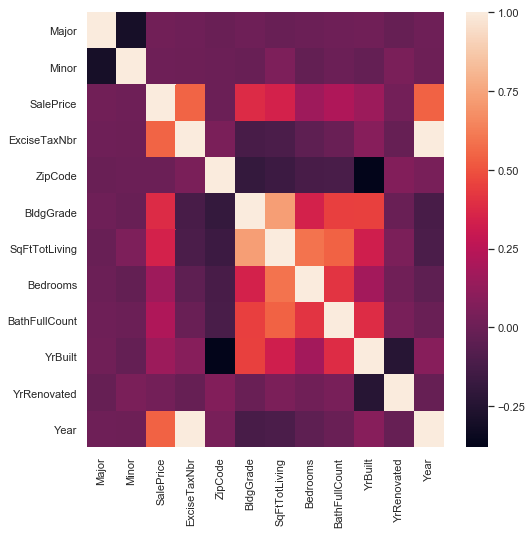

In [30]:
#import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})
# Use the .heatmap method to depict the relationships visually!
sns.heatmap(sales_data.corr())

In [31]:
# Let's look at the correlations with 'saleprice'(our dependent variable) in particular.
abs(sales_data.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
ExciseTaxNbr     0.550943
Year             0.544866
BldgGrade        0.380422
SqFtTotLiving    0.342602
BathFullCount    0.216411
Bedrooms         0.158857
YrBuilt          0.156966
YrRenovated      0.023910
Major            0.021844
Minor            0.008156
ZipCode          0.000964
Name: SalePrice, dtype: float64

In [33]:
X = sales_data[['Year', 'BldgGrade', 'SqFtTotLiving', 'BathFullCount']]
y = sales_data['SalePrice']

In [34]:
predictors = np.asarray(X)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(Y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                 2.662e+05
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:17:39   Log-Likelihood:            -1.0034e+07
No. Observations:              765118   AIC:                         2.007e+07
Df Residuals:                  765114   BIC:                         2.007e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.55e+07   3.41e+04   -748.204      0.000   -2.56e+07   -2.54e+07
x1          5.224e+04    183.831    284.157      0.000    5.19e+04    5.26e+04
x2            33.5493      0.234    143.093      0.000      33.090      34.009
x3          1.266e+04     16.945    746.848      0.000    1.26e+04    1.27e+04
==============================================================================
Omnibus:                    43981.594   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103379.936
Skew:                           0.362   Prob(JB):                         0.00
Kurtosis:                       4.649   Cond. No.                     7.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
np.random.seed(33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [36]:
# Let's create a StandardScaler object to scale our data for us.
# scaling the data helps finding the weighs in the dataset
ss = StandardScaler()


# Now we'll apply it to our data by using the .fit_transform() method.

ss.fit(X_train)


X_train_scaled = ss.transform(X_train)

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [37]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lr.score(ss.transform(X_test), y_test)

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.5122002176699305

In [39]:
lr.coef_

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([ 56628.56430364,  28592.47209751, 103170.38902216])

In [43]:
metrics.r2_score(y_test, lr.predict(ss.transform(X_test)))

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.5122002176699305

In [44]:
metrics.mean_absolute_error(y_test, lr.predict(ss.transform(X_test)))    #median average to every point

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


87439.11432260578

In [46]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(ss.transform(X_test))))

/Users/Erica/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


120087.21909053807